**Ironhack Project-4 |** Requesting information from the local API

---

**Libraries**

In [1]:
# Data
import numpy as np
import pandas as pd

# Requests
import requests
import json
from pandas import json_normalize
import main_queries as qry

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (8,4)})
sns.set_style("whitegrid")

---

# Requests | GET

Checking that the API returns the script of the specified character:

In [2]:
jon_snow_1x01 = qry.get_my_character(season = "season 1", episode = "episode 1", name = "jon snow")
jon_snow_1x01.head()

,Episode,Episode Title,ID,Name,Season,Sentence
0,Episode 1,Winter is Coming,15,Jon Snow,Season 1,Go on. Father's watching.
1,Episode 1,Winter is Coming,16,Jon Snow,Season 1,And your mother.
2,Episode 1,Winter is Coming,21,Jon Snow,Season 1,"Don't think too much, Bran."
3,Episode 1,Winter is Coming,38,Jon Snow,Season 1,Don't look away.
4,Episode 1,Winter is Coming,40,Jon Snow,Season 1,Father will know if you do.


Checking what the API returns if bad request:

In [3]:
jon_snow_1x01_fail = qry.get_my_character(season = "season 1", episode = "episode 1", name = "jon snowe") #invalid name
jon_snow_1x01_fail

'Oops! There was an error in your request. Check our docs for the supported season, episode, and character names.'

**Getting sentiment analysis**

In [4]:
# SA of Jon Snow for the entire season 1
jon_snow_s1_sa = qry.get_my_character_by_season(season = "season 1", name = "jon snow")
jon_snow_s1_sa[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.2732, 0.0, 0.0, 0.0772, 0.0]

In [8]:
season_list = ['season 1', 'season 2', 'season 3', 'season 4', 'season 5', 'season 6', 'season 7', 'season 8']
jon_snow = qry.get_my_character_by_seasons(seasons = season_list, name = "jon snow")
jon_snow

,Season,compound,compound_mean
0,Season 1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.2732, 0.0, 0.0, 0....",0.003271
1,Season 2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.083663
2,Season 3,"[0.0, 0.765, 0.0, 0.0, 0.0, 0.4215, 0.0, 0.0, ...",-0.011766
3,Season 4,"[-0.1779, 0.25, -0.4767, 0.5773, -0.6908, -0.0...",-0.062016
4,Season 5,"[0.0, 0.2235, 0.3612, 0.8096, 0.0, -0.296, 0.0...",0.065362
5,Season 6,"[-0.4404, 0.0, -0.6597, -0.5106, -0.2057, 0.0,...",-0.015581
6,Season 7,"[-0.4033, 0.0, -0.3612, -0.5267, 0.0, 0.0, 0.0...",-0.023019
7,Season 8,"[-0.5862, 0.0, 0.0, 0.0, 0.0, -0.0258, -0.1511...",0.007756


In [9]:
daenerys = qry.get_my_character_by_seasons(seasons = season_list, name = "daenerys targaryen")
daenerys

,Season,compound,compound_mean
0,Season 1,"[0.0, -0.296, -0.1139, 0.0, 0.3612, 0.3612, 0....",0.036445
1,Season 2,"[0.0, 0.0, 0.4404, -0.7003, 0.0, 0.0258, -0.29...",-0.006541
2,Season 3,"[0.0, 0.7964, 0.3612, 0.1611, 0.0, 0.1779, -0....",0.009112
3,Season 4,"[0.0, 0.1431, 0.0, 0.0, 0.4019, 0.7003, -0.381...",0.120774
4,Season 5,"[0.0, 0.5559, 0.0, -0.3582, 0.7269, -0.128, 0....",-0.045221
5,Season 6,"[0.0, 0.6249, -0.296, 0.0, 0.0, 0.5106, 0.0, -...",0.023844
6,Season 7,"[0.0, 0.4019, -0.2755, 0.4404, 0.0, -0.168, -0...",0.018515
7,Season 8,"[0.8271, 0.0772, -0.2755, -0.3029, 0.0, 0.0, -...",0.020395


In [10]:
arya = qry.get_my_character_by_seasons(seasons = season_list, name = "arya stark")
arya

,Season,compound,compound_mean
0,Season 1,"[0.0, 0.0, 0.0, 0.0, 0.5255, 0.0, 0.0, 0.0, 0....",-0.052164
1,Season 2,"[0.0772, 0.4767, 0.4404, 0.3875, 0.0, 0.0, -0....",-0.030662
2,Season 3,"[0.3182, 0.0, 0.0, -0.2023, 0.0, 0.0, 0.3818, ...",-0.083530
3,Season 4,"[0.0, -0.5106, 0.4567, -0.3559, -0.3071, -0.73...",-0.056762
4,Season 5,"[0.0, 0.0, 0.3612, 0.0, 0.0, 0.0, 0.3182, 0.0,...",-0.025476
5,Season 6,"[0.3612, 0.0, -0.296, -0.296, -0.296, 0.0, 0.0...",-0.067432
6,Season 7,"[0.0, 0.4939, 0.3412, 0.0, 0.4708, 0.0, -0.296...",-0.004385
7,Season 8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2755, 0.6124...",-0.045899


# Requests | POST

In [ ]:
# Data to be send to API
params = {'ID':'23911',
        'Release Date':'2022-11-12',
        'Season':'Season 8',
        'Episode':'Episode 6',
        'Episode Title':'The Iron Throne',
        'Name': 'Marc Planas',
        'Sentence':'Really?'}

url = "http://127.0.0.1:5000"
endpoint = "/insertrow"

# Sending post request
# r = requests.post(url = url + endpoint, params = params)
# r

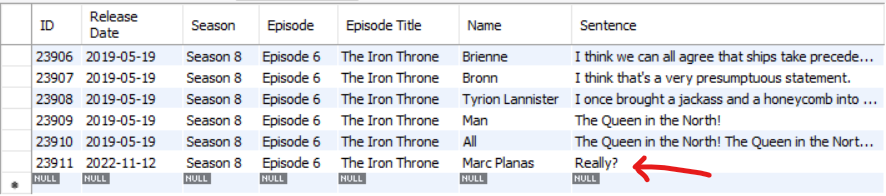